Z test

t-test

chi test

In [1]:
import numpy as np 
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_mean = 110
population_mean = 100
population_std = 15
sample_size =50
alpha = 0.05
confidence_interval = 1 - alpha

In [3]:
z_score = (sample_mean - population_mean)/(population_std/np.sqrt(50))
print(z_score)


4.714045207910317


In [4]:
z_criticical = stats.norm.ppf(confidence_interval)
z_criticical

np.float64(1.6448536269514722)

In [5]:
if z_score > z_criticical:
    print(f"z score value {z_score} is Greater than z critical {z_criticical} We reject Null hypothesis ")

else:
    print("We fail to reject Null hypothesis")

z score value 4.714045207910317 is Greater than z critical 1.6448536269514722 We reject Null hypothesis 


In [7]:
#Performing P value 
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
p_value

np.float64(2.4284674728924927e-06)

Performing Z test, P value test and Z test on iris dataser

In [8]:
iris= pd.read_json("E:\\Dataset\\IRIS Dataset\\iris.json")
iris

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
iris_copy= iris.copy()
iris_copy

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
iris_copy.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

Lower fence is -3.649999999999999
Upper fence is 10.349999999999998
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier found
No outlier fou

<Axes: ylabel='petalLength'>

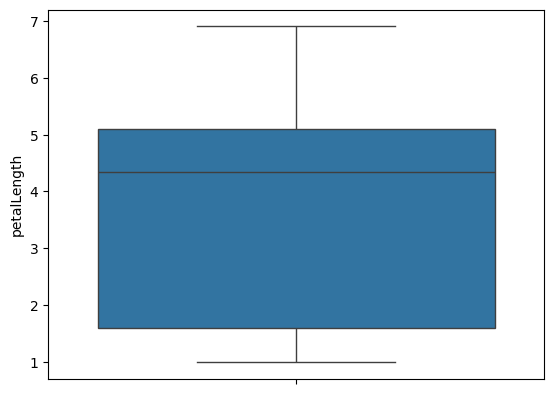

In [12]:
#Box plot for iris petal length

q1,q2,q3,q4 = np.percentile(iris_copy['petalLength'],[25,50,75,100])

#Calculate Inter quartile range
IQR = q3 - q1

#Calculate lower fence and upper fence
Lower_fence = q1- (IQR * 1.5)      
Upper_fence= q3 + (IQR * 1.5)
print(f'Lower fence is {Lower_fence}')
print(f'Upper fence is {Upper_fence}')

for i in iris_copy['petalLength']:
    if i < Lower_fence and i> Upper_fence:
        print(f'Outer lier is {i}')
    else:
        print("No outlier found")

#BOx plot for iris petal length
sns.boxplot(iris_copy['petalLength'])

<Axes: xlabel='petalLength', ylabel='Count'>

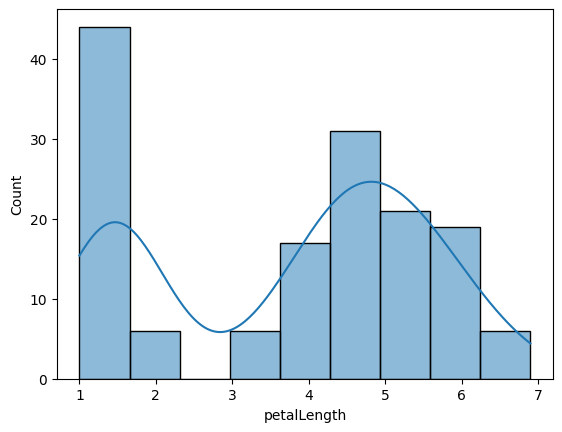

In [13]:
sns.histplot(iris_copy['petalLength'],kde = True)


In [14]:
# Taking sample from iris petal length
np.random.seed(1)
sample1 = np.random.choice(iris_copy['petalLength'],60)
np.random.seed(2)
sample2 = np.random.choice(iris_copy['petalLength'],60)
np.random.seed(3)
sample3= np.random.choice(iris_copy['petalLength'],60)

In [15]:

np.shape(sample1)

(60,)

In [16]:
population_mean = np.mean(iris_copy['petalLength'])
mean1 = np.mean(sample1)
median1 =np.median(sample1)
mode1 = stats.mode(sample1)
sample_size =60
ddof = 1-60
varience1 = np.var(sample1,ddof=ddof)
standard_deviation1 = np.sqrt(varience1)
alpha = 0.05
confidence_interval = 1 -alpha


In [17]:
# Perform z score test for sample

z_score = (mean1 - population_mean)/(standard_deviation1/np.sqrt(sample_size))
z_score

np.float64(0.3713701383091069)

In [19]:
z_criticical = stats.norm.ppf(confidence_interval)
z_criticical

np.float64(1.6448536269514722)

In [20]:
if z_score < z_criticical:
    print("Failed to reject Null Hypothesis")
else:
    print("We reject null hypothsis")

Failed to reject Null Hypothesis


In [21]:
p_value= 2 *(1 - stats.norm.cdf(abs(z_score)))
p_value

np.float64(0.7103618639953517)

Ques. A professor wants to know if her introductory statistics class has a good grasp of basic math. Six students are chosen at random from the class and given a math proficiency test. The professor wants the class to be able to score above 70 on the test. The six students get scores of 62, 92, 75, 68, 83, and 95. Can the professor have 90 percent confidence that the mean score for the class on the test would be above 70?

In [22]:
sample_size = 6
population_mean = 70
student_score =[62,92,75,68,83,95]
confidence_interval = 0.9

import scipy.stats
t_test = scipy.stats.ttest_1samp(student_score,popmean=70) 
t_test

t_stats = t_test[0]
p_value= t_test[1]

In [23]:
df = sample_size - 1

t_critical = stats.t.ppf(0.9,df)
t_critical

np.float64(1.4758840488558216)

In [24]:
if t_stats > t_critical and p_value < 0.1:
    print("Reject the null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


Ques. A Little League baseball coach wants to know if his team is representative of other teams in scoring runs. Nationally, the average number of runs scored by a Little League team in a game is 5.7. He chooses five games at random in which his team scored 5, 9, 4, 11, and 8 runs. Is it likely that his team's scores could have come from the national distribution? Assume an alpha level of 0.05.

In [25]:
team_score = [5,9,4,11,8]
sample_size = 5
population_mean = 5.7
alpha = 0.05
confidence_interval = 1- alpha
dof = 5-1
t_test = stats.ttest_1samp(team_score,popmean=population_mean)

t_stats = t_test[0]
p_value = t_test[1]


t_test

t_critical = stats.t.ppf(confidence_interval,df=dof)

In [26]:
if t_stats > t_critical:
    print("Reject null hypothsis")
else:
    print("Fail to reject null hypothsis")

Fail to reject null hypothsis


In [28]:
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


In [29]:
Score_1 =[3,3,3,12,15,16,17,19,23,24,32]
Score_2 =[20,13,13,20,29,32,23,20,25,15,30]

In [30]:
Score_1_mean = np.mean(Score_1)
Score_1_mean

np.float64(15.181818181818182)

In [31]:
Score_2_mean = np.mean(Score_2)
Score_2_mean

np.float64(21.818181818181817)

In [32]:
t_test = stats.ttest_ind(Score_1,Score_1)
t_test
t_stats = t_test[0]
p_value = t_test[1]

In [34]:
t_test

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(20.0))

In [35]:
t_critical = stats.t.ppf()

TypeError: rv_continuous.ppf() missing 1 required positional argument: 'q'

In [ ]:
# space for t test

Chi square test

In [39]:
tips = pd.read_csv("E:\Dataset\Tips Dataset\\tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [40]:
tips_copy = tips
tips_copy

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
chisq_data = tips_copy[['sex','smoker']]
chisq_data

,sex,smoker
0,Female,No
1,Male,No
2,Male,No
3,Male,No
4,Female,No
...,...,...
239,Male,No
240,Female,Yes
241,Male,Yes
242,Male,No


In [47]:
# To segreigate catagorical data
sex_somker_data = pd.crosstab(chisq_data['sex'],chisq_data['smoker'])
sex_somker_data

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [60]:
sex_somker_array = sex_somker_data.values

In [62]:
observed_value = sex_somker_array

In [53]:
stats_test,p,dof,Expecteed_value = stats.chi2_contingency(sex_somker_array)

In [ ]:
#Expected value
Expecteed_value

array([[53.84016393, 33.15983607],
       [97.15983607, 59.84016393]])

In [57]:
dof

1

In [58]:
p

np.float64(1.0)

In [59]:
stats_test

np.float64(0.0)

In [63]:
for o,e in zip(observed_value,Expecteed_value):
    print(o)
    print(e)


[54 33]
[53.84016393 33.15983607]
[97 60]
[97.15983607 59.84016393]


In [65]:
x_squar = sum((o-e)**2/e)
x_squar

np.float64(0.0006898738224860787)